In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.set_random_seed(1)
np.random.seed(1)

In [3]:
LR = 0.01
BATCH_SIZE = 32

In [4]:
# fake data
x = np.linspace(-1, 1, 100)[:, np.newaxis]          # shape (100, 1)
noise = np.random.normal(0, 0.1, size=x.shape)
y = np.power(x, 2) + noise                          # shape (100, 1) + some noise

In [7]:
print(x.shape)

(100, 1)


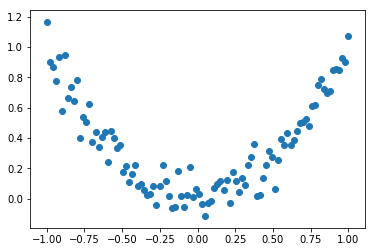

In [8]:
# plot dataset
plt.scatter(x, y)
plt.show()

In [9]:
# default network
class Net:
    def __init__(self, opt, **kwargs):
        self.x = tf.placeholder(tf.float32, [None, 1])
        self.y = tf.placeholder(tf.float32, [None, 1])
        l = tf.layers.dense(self.x, 20, tf.nn.relu)
        out = tf.layers.dense(l, 1)
        self.loss = tf.losses.mean_squared_error(self.y, out)
        self.train = opt(LR, **kwargs).minimize(self.loss)

In [10]:
# different nets
net_SGD         = Net(tf.train.GradientDescentOptimizer)
net_Momentum    = Net(tf.train.MomentumOptimizer, momentum=0.9)
net_RMSprop     = Net(tf.train.RMSPropOptimizer)
net_Adam        = Net(tf.train.AdamOptimizer)
nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

In [11]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [12]:
losses_his = [[], [], [], []]   # record loss

In [15]:
index = np.random.randint(0, x.shape[0], BATCH_SIZE)
index.shape

(32,)

In [22]:
b_x = x[index]

In [24]:
b_x.shape

(32, 1)

In [16]:
# training
for step in range(300):          # for each training step
    index = np.random.randint(0, x.shape[0], BATCH_SIZE)
    b_x = x[index]
    b_y = y[index]

    for net, l_his in zip(nets, losses_his):
        _, l = sess.run([net.train, net.loss], {net.x: b_x, net.y: b_y})
        l_his.append(l)     # loss recoder

In [21]:
len(losses_his[0])

300

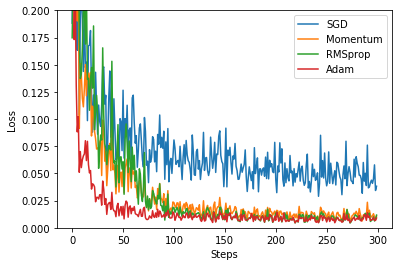

In [17]:
# plot loss history
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
for i, l_his in enumerate(losses_his):
    plt.plot(l_his, label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()